In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3 as sq
%matplotlib inline

In [2]:
sns.set_context(context='notebook', font_scale=1.5)
sns.set_style('ticks')

In [3]:
%load_ext autoreload
%autoreload 2

Rocking some buoypy

In [4]:
import buoypy as bp

In [5]:
B = bp.realtime(41108)

In [6]:
X = B.txt()

In [7]:
X.head()

WDIR  WSPD  GST  WVHT  DPD  APD    MWD  PRES  ATMP  WTMP  \
Date                                                                            
2019-03-07 04:00:00   NaN   NaN  NaN   0.5  3.0  4.1  274.0   NaN   NaN  12.7   
2019-03-07 03:30:00   NaN   NaN  NaN   0.5  3.0  3.8  278.0   NaN   NaN  12.8   
2019-03-07 03:00:00   NaN   NaN  NaN   0.5  4.0  3.7  271.0   NaN   NaN  12.9   
2019-03-07 02:30:00   NaN   NaN  NaN   0.6  3.0  3.4  276.0   NaN   NaN  12.9   
2019-03-07 02:00:00   NaN   NaN  NaN   0.6  7.0  3.5  158.0   NaN   NaN  13.0   

                     DEWP  VIS  PTDY  TIDE  
Date                                        
2019-03-07 04:00:00   NaN  NaN   NaN   NaN  
2019-03-07 03:30:00   NaN  NaN   NaN   NaN  
2019-03-07 03:00:00   NaN  NaN   NaN   NaN  
2019-03-07 02:30:00   NaN  NaN   NaN   NaN  
2019-03-07 02:00:00   NaN  NaN   NaN   NaN

In [8]:
len(X)

2152

In [9]:
X.describe()

WDIR  WSPD  GST         WVHT          DPD          APD          MWD  \
count   0.0   0.0  0.0  2151.000000  2151.000000  2149.000000  2149.000000   
mean    NaN   NaN  NaN     0.971595     7.084147     4.694323   151.631922   
std     NaN   NaN  NaN     0.448239     2.361687     0.806004    54.894667   
min     NaN   NaN  NaN     0.300000     3.000000     3.000000     1.000000   
25%     NaN   NaN  NaN     0.700000     5.000000     4.100000   123.000000   
50%     NaN   NaN  NaN     0.900000     7.000000     4.600000   149.000000   
75%     NaN   NaN  NaN     1.200000     8.000000     5.100000   177.000000   
max     NaN   NaN  NaN     3.500000    17.000000     7.500000   359.000000   

       PRES  ATMP         WTMP  DEWP  VIS  PTDY  TIDE  
count   0.0   0.0  2152.000000   0.0  0.0   0.0   0.0  
mean    NaN   NaN    12.421236   NaN  NaN   NaN   NaN  
std     NaN   NaN     0.824621   NaN  NaN   NaN   NaN  
min     NaN   NaN    10.300000   NaN  NaN   NaN   NaN  
25%     NaN   NaN    11.800000   NaN  NaN   NaN   NaN  
50%     NaN   NaN    12.400000   NaN  NaN   NaN   NaN  
75%     NaN   NaN    13.000000   NaN  NaN   NaN   NaN  
max     NaN   NaN    15.500000   NaN  NaN   NaN   NaN

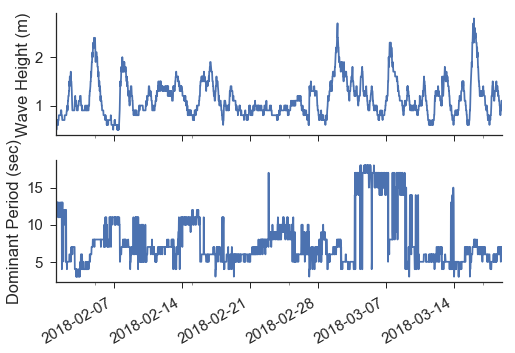

In [13]:
fig,ax = plt.subplots(2,sharex=True)
X['WVHT'].plot(ax=ax[0])
ax[0].set_ylabel('Wave Height (m)')

X['DPD'].plot(ax=ax[1])
ax[1].set_ylabel('Dominant Period (sec)')
ax[1].set_xlabel('')
sns.despine()

In [14]:
#fig.savefig('../figures/realtime.png',bbox_inches='tight')

# Historic Data

In [2]:
import requests
import pandas as pd

C:\Users\HPHP\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
link = "http://www.ndbc.noaa.gov/view_text_file.php?filename=41013h2017.txt.gz&dir=data/historical/stdmet/"

In [4]:
r = requests.get(link)

In [7]:
r.text[0:1000]

'#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS  TIDE\n#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC   mi    ft\n2017 01 01 00 00 274  7.9 10.2 99.00 99.00 99.00 999 1023.2  16.1  21.9  10.4 99.0 99.00 \n2017 01 01 00 10 276  7.9  9.8 99.00 99.00 99.00 999 1023.3  16.0  21.9  10.1 99.0 99.00 \n2017 01 01 00 20 274  7.8  9.7 99.00 99.00 99.00 999 1023.3  16.1  22.0  10.2 99.0 99.00 \n2017 01 01 00 30 272  8.4 10.6 99.00 99.00 99.00 999 1023.4  16.2  22.0  10.4 99.0 99.00 \n2017 01 01 00 40 268  8.1 10.2 99.00 99.00 99.00 999 1023.2  16.4  22.0  10.2 99.0 99.00 \n2017 01 01 00 50 261  8.0  9.9  1.05  4.76  3.77 201 1023.1  16.7  22.1  10.2 99.0 99.00 \n2017 01 01 01 00 258  7.1  9.2 99.00 99.00 99.00 999 1022.9  16.8  22.1  10.1 99.0 99.00 \n2017 01 01 01 10 253  6.6  8.5 99.00 99.00 99.00 999 1022.9  16.9  22.1  10.3 99.0 99.00 \n2017 01 01 01 20 255  6.9  9.1 99.00 99.00 99.00 999 1022.8  17.1  22.1  10.4 99.0 99.00 \n

In [18]:
X = pd.read_csv(link, header=0, delim_whitespace=True, dtype=object)

In [19]:
X.head()

#YY  MM  DD  hh  mm  WDIR WSPD   GST   WVHT    DPD    APD   MWD    PRES  \
0   #yr  mo  dy  hr  mn  degT  m/s   m/s      m    sec    sec  degT     hPa   
1  2017  01  01  00  00   274  7.9  10.2  99.00  99.00  99.00   999  1023.2   
2  2017  01  01  00  10   276  7.9   9.8  99.00  99.00  99.00   999  1023.3   
3  2017  01  01  00  20   274  7.8   9.7  99.00  99.00  99.00   999  1023.3   
4  2017  01  01  00  30   272  8.4  10.6  99.00  99.00  99.00   999  1023.4   

   ATMP  WTMP  DEWP   VIS   TIDE  
0  degC  degC  degC    mi     ft  
1  16.1  21.9  10.4  99.0  99.00  
2  16.0  21.9  10.1  99.0  99.00  
3  16.1  22.0  10.2  99.0  99.00  
4  16.2  22.0  10.4  99.0  99.00

In [20]:
len(X)

52315

In [9]:
buoy = 41013
year = 2017
#41013h2017

H = bp.historic_data(buoy, year)

In [10]:
X = H.get_stand_meteo()

In [11]:
len(X)

52314

In [12]:
X.head(2)

WDIR  WSPD   GST  WVHT   DPD   APD  MWD    PRES  ATMP  \
2017-01-01 00:00:00  274.0   7.9  10.2  99.0  99.0  99.0  NaN  1023.2  16.1   
2017-01-01 00:10:00  276.0   7.9   9.8  99.0  99.0  99.0  NaN  1023.3  16.0   

                     WTMP  DEWP  VIS  TIDE  
2017-01-01 00:00:00  21.9  10.4  NaN  99.0  
2017-01-01 00:10:00  21.9  10.1  NaN  99.0

In [13]:
X.describe()

WDIR          WSPD           GST          WVHT           DPD  \
count  52224.000000  52288.000000  52288.000000  52314.000000  52314.000000   
mean     175.170094      6.796259      8.635635     82.767572     83.770465   
std      100.614137      3.131410      3.863198     36.360575     34.125136   
min        0.000000      0.000000      0.000000      0.320000      2.470000   
25%       70.000000      4.500000      5.800000     99.000000     99.000000   
50%      202.000000      6.600000      8.200000     99.000000     99.000000   
75%      244.000000      9.100000     11.300000     99.000000     99.000000   
max      360.000000     17.300000     27.800000     99.000000     99.000000   

                APD          MWD          PRES          ATMP          WTMP  \
count  52314.000000  8644.000000  52259.000000  52284.000000  52109.000000   
mean      83.384276   140.368579   1017.559052     21.353896     23.555706   
std       34.980079    61.296241      6.278610      5.615455      3.477152   
min        3.020000     0.000000    989.600000     -0.800000     13.400000   
25%       99.000000   100.000000   1014.000000     17.900000     20.900000   
50%       99.000000   132.000000   1017.500000     22.400000     23.800000   
75%       99.000000   185.000000   1021.100000     26.000000     26.900000   
max       99.000000   359.000000   1042.200000     29.900000     30.200000   

               DEWP  VIS     TIDE  
count  52276.000000  0.0  52314.0  
mean      16.563832  NaN     99.0  
std        7.501266  NaN      0.0  
min       -8.800000  NaN     99.0  
25%       12.300000  NaN     99.0  
50%       18.200000  NaN     99.0  
75%       22.600000  NaN     99.0  
max       28.000000  NaN     99.0

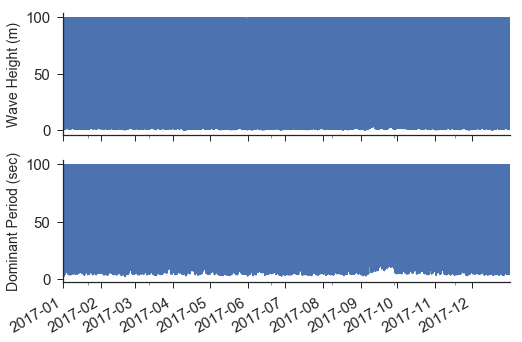

In [14]:
fig,ax = plt.subplots(2,sharex=True)
X.WVHT.plot(ax=ax[0])
ax[0].set_ylabel('Wave Height (m)',fontsize=14)
X.DPD.plot(ax=ax[1])
ax[1].set_ylabel('Dominant Period (sec)',fontsize=14)
ax[1].set_xlabel('')
sns.despine()

In [49]:
#fig.savefig('../figures/historic.png',bbox_inches='tight')

In [16]:
from bs4 import BeautifulSoup
import requests

In [17]:
link = "http://www.ndbc.noaa.gov/historical_data.shtml"

In [18]:
# fetch the content from url
page_response = requests.get(link, timeout=5)
# parse html
page_content = BeautifulSoup(page_response.content, "html.parser")

In [ ]:
#page_content

In [27]:
ulis = page_content.find_all('ul')

In [29]:
lis = ulis[1].find_all('li')

In [30]:
lis[0]

<li><a name="stdmet"></a><b>Standard Meterological</b> <a href="/measdes.shtml#stdmet">(measurement description)</a><ul>
<li>0Y2W3:
    <a href="/download_data.php?filename=0y2w3h2012.txt.gz&amp;dir=data/historical/stdmet/">2012</a>
<a href="/download_data.php?filename=0y2w3h2013.txt.gz&amp;dir=data/historical/stdmet/">2013</a>
<a href="/download_data.php?filename=0y2w3h2014.txt.gz&amp;dir=data/historical/stdmet/">2014</a>
<a href="/download_data.php?filename=0y2w3h2015.txt.gz&amp;dir=data/historical/stdmet/">2015</a>
</li>
<li>18CI3:
    <a href="/download_data.php?filename=18ci3h2014.txt.gz&amp;dir=data/historical/stdmet/">2014</a>
<a href="/download_data.php?filename=18ci3h2015.txt.gz&amp;dir=data/historical/stdmet/">2015</a>
</li>
<li>20CM4:
    <a href="/download_data.php?filename=20cm4h2014.txt.gz&amp;dir=data/historical/stdmet/">2014</a>
<a href="/download_data.php?filename=20cm4h2015.txt.gz&amp;dir=data/historical/stdmet/">2015</a>
</li>
<li>23020:
    <a href="/download_data.p

# Get date range

In [5]:
import buoypy as bp
buoy = 41108
yr = np.NAN
years = (2010,2018)

H = bp.historic_data(41108,year=yr,year_range=years)

In [6]:
X = H.get_all_stand_meteo()

AttributeError: 'historic_data' object has no attribute 'year_range'

In [15]:
X.tail()

WDIR  WSPD  GST  WVHT   DPD   APD   MWD  PRES  ATMP  \
2016-04-30 21:56:00   NaN   NaN  NaN  0.92  3.85  3.65  85.0   NaN   NaN   
2016-04-30 22:26:00   NaN   NaN  NaN  1.00  4.35  3.73  84.0   NaN   NaN   
2016-04-30 22:56:00   NaN   NaN  NaN  1.01  3.85  3.75  81.0   NaN   NaN   
2016-04-30 23:26:00   NaN   NaN  NaN  1.11  5.00  3.87  85.0   NaN   NaN   
2016-04-30 23:56:00   NaN   NaN  NaN  1.17  5.26  3.81  88.0   NaN   NaN   

                     WTMP  DEWP  VIS  TIDE  
2016-04-30 21:56:00  19.6   NaN  NaN   NaN  
2016-04-30 22:26:00  19.6   NaN  NaN   NaN  
2016-04-30 22:56:00  19.5   NaN  NaN   NaN  
2016-04-30 23:26:00  19.4   NaN  NaN   NaN  
2016-04-30 23:56:00  19.4   NaN  NaN   NaN

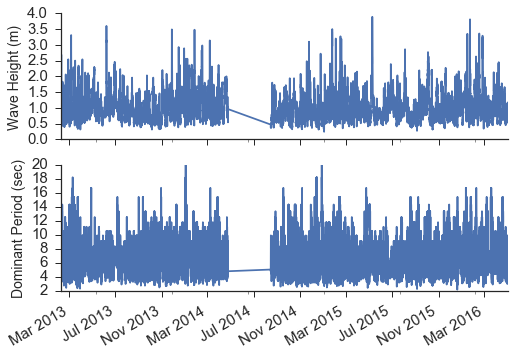

In [17]:
fig,ax = plt.subplots(2,sharex=True)
X.WVHT.plot(ax=ax[0])
ax[0].set_ylabel('Wave Height (m)',fontsize=14)
X.DPD.plot(ax=ax[1])
ax[1].set_ylabel('Dominant Period (sec)',fontsize=14)
ax[1].set_xlabel('')
sns.despine()

In [18]:
#fig.savefig('../figures/historic_range.png',bbox_inches='tight')

In [52]:
X.tail()

WDIR  WSPD  GST  WVHT   DPD   APD    MWD  PRES  ATMP  \
2015-12-31 21:26:00   NaN   NaN  NaN  0.96  5.56  4.46  171.0   NaN   NaN   
2015-12-31 22:26:00   NaN   NaN  NaN  0.93  5.26  4.49  174.0   NaN   NaN   
2015-12-31 22:56:00   NaN   NaN  NaN  0.91  5.00  4.46  172.0   NaN   NaN   
2015-12-31 23:26:00   NaN   NaN  NaN  0.93  5.26  4.48  171.0   NaN   NaN   
2015-12-31 23:56:00   NaN   NaN  NaN  0.93  5.56  4.53  174.0   NaN   NaN   

                     WTMP  DEWP  VIS  TIDE  
2015-12-31 21:26:00  20.7   NaN  NaN   NaN  
2015-12-31 22:26:00  20.7   NaN  NaN   NaN  
2015-12-31 22:56:00  20.7   NaN  NaN   NaN  
2015-12-31 23:26:00  20.7   NaN  NaN   NaN  
2015-12-31 23:56:00  20.7   NaN  NaN   NaN

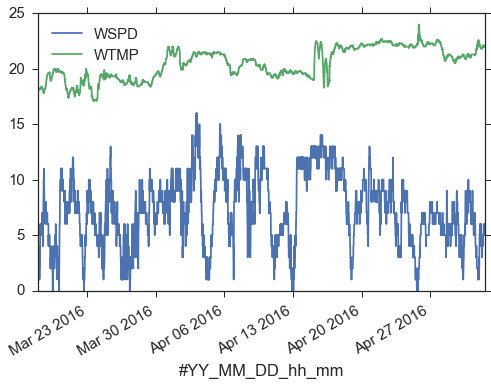

In [136]:
A.plot()

In [137]:
#alter the line below to correspond to your file system
fdir = '/Users/nickc/Documents/skCCM'
sys.path.append(fdir)

In [138]:
import skCCM.skCCM as ccm
import skCCM.data as data

In [139]:
x1 = A.WSPD.values
x2 = A.WTMP.values

x1 -= np.mean(x1)
x2 -= np.mean(x2)

x1 /= np.std(x1)
x2 /= np.std(x2)

In [168]:
x1 = np.random.rand(len(x1)) + np.sin(np.linspace(0,np.pi*40,len(x1)))

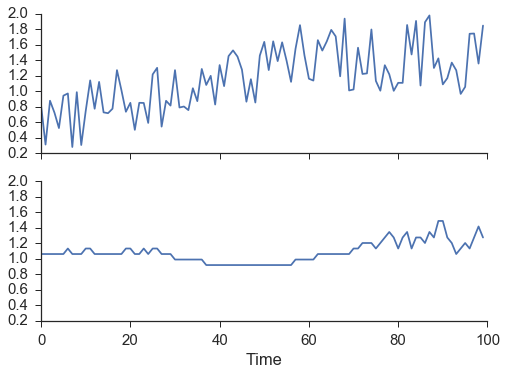

In [180]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(x1[0:100])
ax[1].plot(x2[0:100])
#ax[0].set_yticks([.1,.3,.5,.7,.9])
ax[1].set_xlabel('Time')
sns.despine()

In [170]:
em_x1 = ccm.embed(x1)
em_x2 = ccm.embed(x2)

In [182]:
mi1 = em_x1.mutual_information(300)
mi2 = em_x2.mutual_information(300)

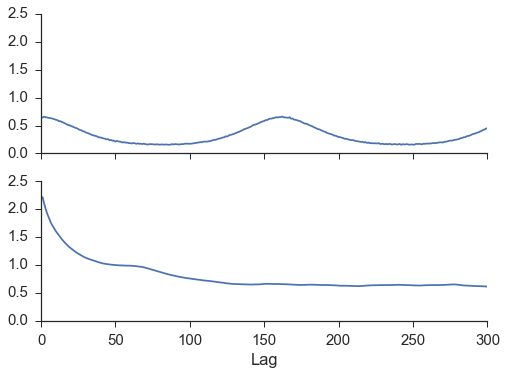

In [183]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,301),mi1)
ax[1].plot(np.arange(1,301),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [184]:
lag1 = 50
lag2 = 50
embed = 4
X1 = em_x1.embed_vectors_1d(lag1,embed)
X2 = em_x2.embed_vectors_1d(lag2,embed)

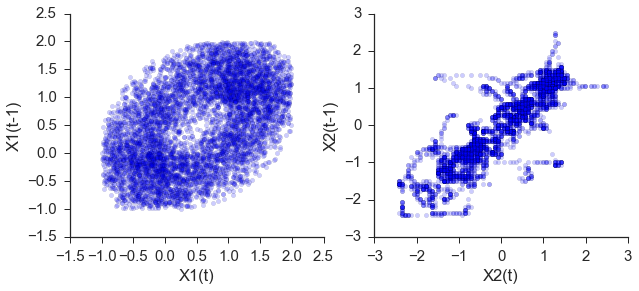

In [185]:
fig,ax = plt.subplots(ncols=2,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1],alpha=.2)
ax[1].scatter(X2[:,0],X2[:,1],alpha=.2)
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [186]:
CCM = ccm.ccm()

In [187]:
sc1, sc2 = CCM.predict_causation(X1,X2,4)

In [188]:
print sc1
print sc2

[ 0.79120797]
[-0.35117208]


In [189]:
ts_length = len(x1)
lib_lens = np.arange(10,ts_length,ts_length/20)
sc1, sc2 = CCM.predict_causation_lib_len(X1,X2,lib_lens,4)

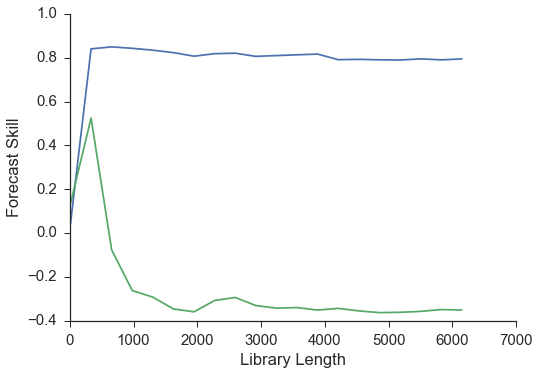

In [190]:
fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2')
ax.plot(lib_lens,sc2, label='X2 xmap X1')
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()

In [7]:
gf6 = gd.get_months(41110)

In [13]:
X = gf6.get_stand_meteo()

Feb2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111022016.txt.gz&dir=data/stdmet/Feb/
http://www.ndbc.noaa.gov/data/stdmet/Feb/41110.txtwas found in records
Mar2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111032016.txt.gz&dir=data/stdmet/Mar/
Apr2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111042016.txt.gz&dir=data/stdmet/Apr/
May2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111052016.txt.gz&dir=data/stdmet/May/
Jun2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111062016.txt.gz&dir=data/stdmet/Jun/
Jul2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111072016.txt.gz&dir=data/stdmet/Jul/
Aug2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111082016.txt.gz&dir=data/stdmet/Aug/
Sep2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111092016.txt.gz&dir=data/stdmet/Sep/
Oct2015 n

In [15]:
X.tail()

WDIR  WSPD  GST  WVHT   DPD   APD  MWD  PRES  ATMP  WTMP  \
2016-02-29 21:36:00   NaN   NaN  NaN  1.07  4.55  3.85  189   NaN   NaN  11.5   
2016-02-29 22:06:00   NaN   NaN  NaN  1.05  4.35  3.91  192   NaN   NaN  11.4   
2016-02-29 22:36:00   NaN   NaN  NaN  0.98  5.00  3.93  184   NaN   NaN  11.5   
2016-02-29 23:06:00   NaN   NaN  NaN  1.00  4.17  3.96  189   NaN   NaN  11.5   
2016-02-29 23:36:00   NaN   NaN  NaN  0.95  5.00  4.08  185   NaN   NaN  11.5   

                     DEWP  VIS  TIDE  
2016-02-29 21:36:00   NaN  NaN   NaN  
2016-02-29 22:06:00   NaN  NaN   NaN  
2016-02-29 22:36:00   NaN  NaN   NaN  
2016-02-29 23:06:00   NaN  NaN   NaN  
2016-02-29 23:36:00   NaN  NaN   NaN

In [9]:
gf7 = gd.get_historic(41110,1970,year_range=(2014,2015))

In [10]:
gf7.hist_stand_meteo()

HTTPError: HTTP Error 404: Not Found

In [11]:
b_41110 = bp.read_data(41110)
b_41013 = bp.read_data(41013)
b_41108 = bp.read_data(41108)

In [12]:
df_41110 = b_41110.get_stand_meteo()
df_41013 = b_41013.get_stand_meteo()
df_41108 = b_41108.get_stand_meteo()

In [14]:
#b_41108

In [15]:
df_41110.head()

WDIR  WSPD   GST  WVHT   DPD   APD  MWD  PRES  ATMP  \
date                                                                       
2008-05-07 20:21:00  None  None  None  0.61  9.09  4.37  NaN  None  None   
2008-05-07 20:51:00  None  None  None  0.64  9.09  4.10  104  None  None   
2008-05-07 21:21:00  None  None  None  0.64  9.88  4.16   98  None  None   
2008-05-07 21:51:00  None  None  None  0.63  6.67  4.11  120  None  None   
2008-05-07 22:21:00  None  None  None  0.66  9.88  4.01  102  None  None   

                     WTMP  DEWP   VIS  TIDE  
date                                         
2008-05-07 20:21:00  21.7  None  None  None  
2008-05-07 20:51:00  21.7  None  None  None  
2008-05-07 21:21:00  21.7  None  None  None  
2008-05-07 21:51:00  21.7  None  None  None  
2008-05-07 22:21:00  21.7  None  None  None

In [16]:
np.max(df_41013.index.values)

numpy.datetime64('2015-11-30T18:50:00.000000000-0500')

In [17]:
c = sns.color_palette()

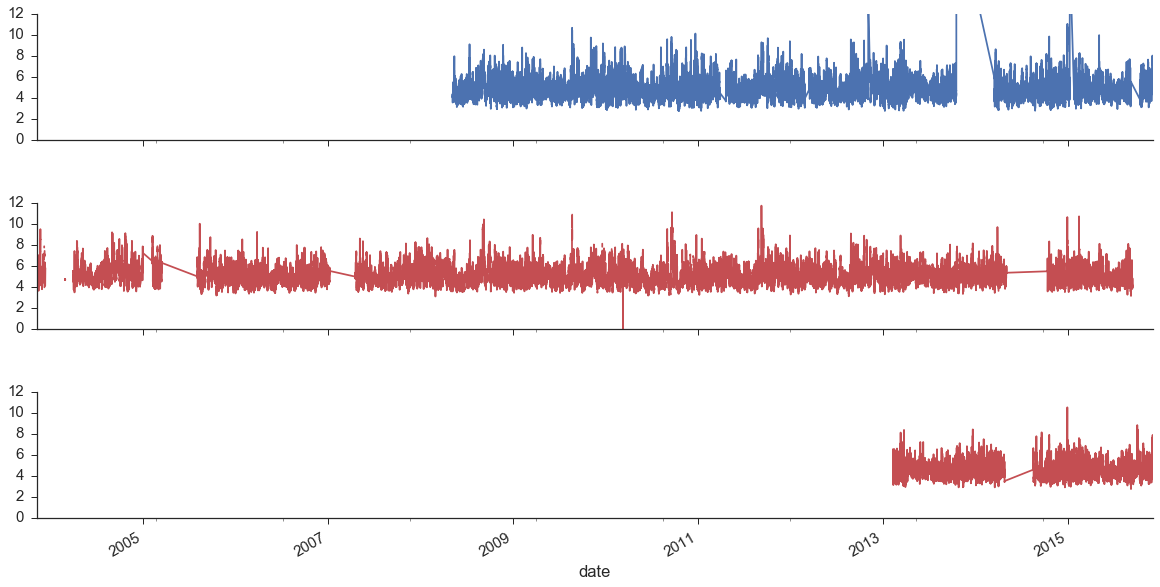

In [18]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(20,10))

df_41110.APD.plot(ax=ax[0])
df_41013.APD.plot(ax=ax[1],color=c[2])
df_41108.APD.plot(ax=ax[2],color=c[2])

mn = np.min(df_41013.index.values)
mx = np.max(df_41013.index.values)

for a in ax:
    a.set_ylim((0,12))
    a.set_xlim((mn,mx))

sns.despine()
fig.subplots_adjust(hspace=.5)

# Combine them into one large dataframe
1. Resample hours so they can be merged easily
2. Drop useless columns, only need [DPD, MWD]
3. Merge on matching indices

In [16]:
T = df_41110.resample('H', how='mean')[['WVHT','DPD']]

In [17]:
T.head()

WVHT    DPD
date                             
2008-05-07 20:00:00  0.625  9.090
2008-05-07 21:00:00  0.635  8.275
2008-05-07 22:00:00  0.660  9.880
2008-05-07 23:00:00  0.655  8.065
2008-05-08 00:00:00  0.690  6.250

In [18]:
F1 = df_41013.resample('H',how='mean')[['WVHT','DPD']]

In [19]:
F1.head()

WVHT    DPD
date                            
2003-11-10 23:00:00   NaN    NaN
2003-11-11 00:00:00  2.14   9.09
2003-11-11 01:00:00  2.13   9.09
2003-11-11 02:00:00  2.13   9.09
2003-11-11 03:00:00  2.14  10.00

In [20]:
F2 = df_41108.resample('H',how='mean')[['WVHT','DPD']]

In [21]:
F2.head()

WVHT    DPD
date                             
2013-02-07 22:00:00  1.550  5.880
2013-02-07 23:00:00  1.535  6.695
2013-02-08 00:00:00  1.565  6.510
2013-02-08 01:00:00  1.530  7.415
2013-02-08 02:00:00  1.435  7.180

In [25]:
F = F1.merge(F2,how='outer',left_index=True,right_index=True)

In [27]:
F.columns = ['F1_wvht','F1_dpd','F2_wvht','F2_dpd']

In [28]:
F.head()

F1_wvht  F1_dpd  F2_wvht  F2_dpd
date                                                 
2003-11-10 23:00:00      NaN     NaN      NaN     NaN
2003-11-11 00:00:00     2.14    9.09      NaN     NaN
2003-11-11 01:00:00     2.13    9.09      NaN     NaN
2003-11-11 02:00:00     2.13    9.09      NaN     NaN
2003-11-11 03:00:00     2.14   10.00      NaN     NaN

In [32]:
X = F.merge(T,how='outer',left_index=True,right_index=True)

In [35]:
X = X.dropna()

In [36]:
X.head()

F1_wvht  F1_dpd  F2_wvht  F2_dpd   WVHT    DPD
date                                                               
2013-02-07 22:00:00     1.95    6.67    1.550   5.880  1.880  6.115
2013-02-07 23:00:00     2.23    7.69    1.535   6.695  2.115  6.905
2013-02-08 00:00:00     2.19    7.14    1.565   6.510  2.165  7.140
2013-02-08 01:00:00     2.31    7.69    1.530   7.415  2.340  7.690
2013-02-08 02:00:00     2.15    8.33    1.435   7.180  2.475  8.330

In [51]:
cc = np.corrcoef(X.F2_dpd,X.DPD)

In [52]:
cc

array([[ 1.        ,  0.64797763],
       [ 0.64797763,  1.        ]])

In [41]:
def score(preds,test):


    u = np.square(test-preds).sum()
    v = np.square(test-test.mean()).sum()
    r2 = 1 - u/v

    return r2

In [72]:
score(X.F2_dpd,X.DPD)

0.24356270577174344

### Linear regression

In [73]:
from sklearn import linear_model

In [87]:
regr = linear_model.LinearRegression()

features = X[['F1_wvht','F1_dpd','F2_wvht','F2_dpd']]
targets = X['DPD']
regr.fit(features[0:10000], targets[0:10000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
preds = regr.predict(features[10000:])

In [89]:
score(preds,targets[10000:])

0.4317673187069907

In [79]:
np.corrcoef(preds,targets)

array([[ 1.      ,  0.689111],
       [ 0.689111,  1.      ]])

### Decision tress

In [ ]:
from sklearn import tree

In [90]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(features[0:10000], targets[0:10000])
preds2 = clf.predict(features[10000:])


In [91]:
score(preds2,targets[10000:])

-0.24514124646627145

### near neighbors

In [92]:
from sklearn import neighbors

In [93]:
# initiate the knn object
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn_func = knn.fit(features[0:10000], targets[0:10000])

In [94]:
preds3 = knn_func.predict(features[10000:])

In [95]:
score(preds3,targets[10000:])

0.26275878978487244

### Neural Networks

In [97]:
from sknn.mlp import Regressor, Layer

In [99]:
nn = Regressor(
    layers=[
        Layer("Rectifier", units=5),
        Layer("Rectifier", units=5),
        Layer("Gaussian")],
    learning_rate=0.001,
    n_iter=400)

In [101]:
#nn.fit(features[0:10000], targets[0:10000])

#preds4 = nn.predict(features[10000:])

In [ ]:
score(preds4,)

In [58]:
def score_matrix(X):
    X = X.values
    r,c = X.shape
    s_m = np.zeros((c,c))
    
    for ii in range(c):
        for jj in range(c):
            
            s_m[ii,jj] = score(X[:,ii],X[:,jj])
    return s_m
    

In [59]:
g = score_matrix(X)

In [64]:
np.set_printoptions(suppress=True)

In [71]:
np.around(g,decimals=2)

array([[   1.  ,   -7.87,   -0.36,   -5.6 ,   -0.87,   -6.68],
       [ -96.76,    1.  , -256.86,    0.36, -295.56,    0.22],
       [   0.43,   -8.8 ,    1.  ,   -6.3 ,    0.62,   -7.42],
       [ -89.99,    0.2 , -239.18,    1.  , -275.25,    0.24],
       [   0.32,   -8.85,    0.66,   -6.34,    1.  ,   -7.48],
       [-108.29,   -0.01, -284.98,    0.22, -328.51,    1.  ]])

In [68]:
G = np.corrcoef(X)

KeyboardInterrupt: 

In [ ]:
cc_df = pd.DataFrame()

In [34]:
df_41108.head()

WDIR  WSPD   GST  WVHT   DPD   APD  MWD  PRES  ATMP  \
date                                                                       
2013-02-07 22:59:00  None  None  None  1.55  5.88  4.48  105  None  None   
2013-02-07 23:29:00  None  None  None  1.57  7.14  4.54  109  None  None   
2013-02-07 23:59:00  None  None  None  1.50  6.25  4.39  NaN  None  None   
2013-02-08 00:29:00  None  None  None  1.60  5.88  4.43   92  None  None   
2013-02-08 00:59:00  None  None  None  1.53  7.14  4.39  102  None  None   

                     WTMP  DEWP   VIS  TIDE  
date                                         
2013-02-07 22:59:00  12.2  None  None  None  
2013-02-07 23:29:00  12.2  None  None  None  
2013-02-07 23:59:00  12.2  None  None  None  
2013-02-08 00:29:00  12.2  None  None  None  
2013-02-08 00:59:00  12.1  None  None  None

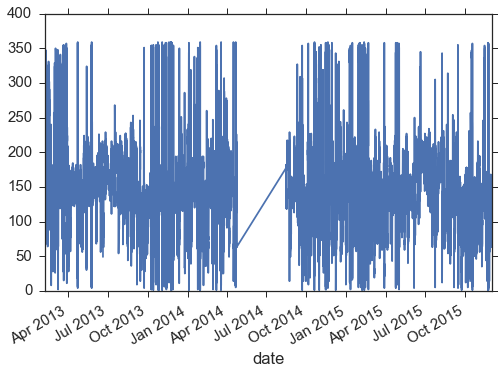

In [37]:
df_41108.MWD.plot()

In [38]:
from windrose import WindroseAxes

#Create wind speed and direction variables

ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

In [ ]:
df = pd.DataFrame({"speed": ws, "direction": wd})
df

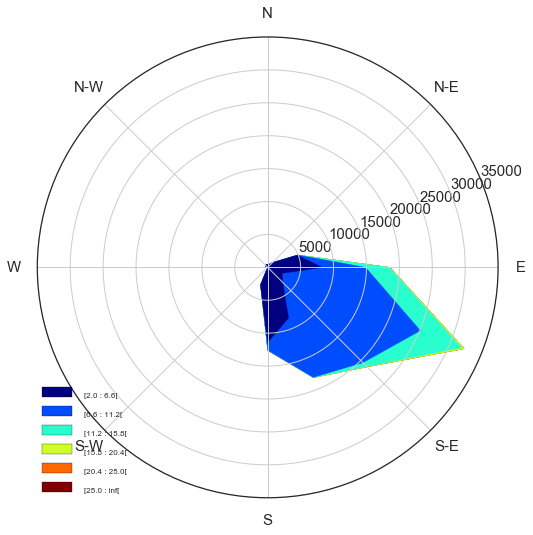

In [40]:
ax = WindroseAxes.from_ax()
ax.contourf(df_41110.MWD, df_41110.DPD)#, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

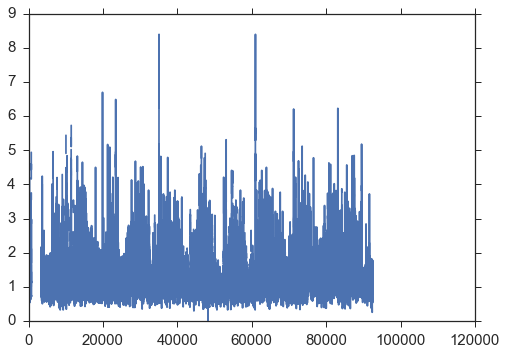

In [43]:
plt.plot(df_41013.WVHT.values)

In [55]:
mx - mn

numpy.timedelta64(380422200000000000,'ns')

(array([  3.97000000e+02,   2.06640000e+04,   2.89930000e+04,
          1.79170000e+04,   9.86500000e+03,   5.38300000e+03,
          2.88100000e+03,   1.38000000e+03,   7.02000000e+02,
          3.35000000e+02,   1.59000000e+02,   8.20000000e+01,
          2.70000000e+01,   2.80000000e+01,   1.80000000e+01,
          8.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   6.00000000e+00]),
 array([ 0.  ,  0.42,  0.84,  1.26,  1.68,  2.1 ,  2.52,  2.94,  3.36,
         3.78,  4.2 ,  4.62,  5.04,  5.46,  5.88,  6.3 ,  6.72,  7.14,
         7.56,  7.98,  8.4 ]),
 <a list of 20 Patch objects>)

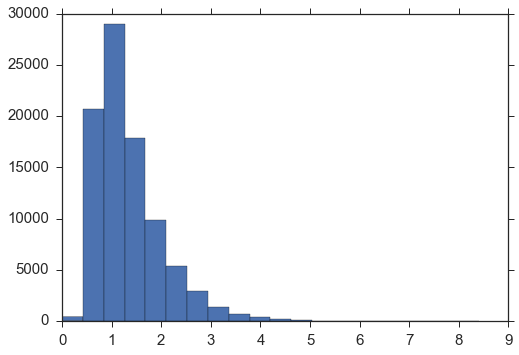

In [53]:
plt.hist(df_41013.WVHT[~np.isnan(df_41013.WVHT)],bins=20)

In [51]:
type(a)

numpy.float64

In [5]:
hist = bp.historic_data(41110,2008,year_range=(2000,2017))

In [6]:
df4 = hist.get_stand_meteo()

In [40]:
wr = bp.write_data(41002,2008,year_range=(2000,2017))

In [41]:
g = wr.write_all_stand_meteo()

2009 not in records
2011 not in records
2015 not in records
2016 not in records
2017 not in records
Dec2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=41002c2015.txt.gz&dir=data/stdmet/Dec/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2000.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2001.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2002.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2003.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2004.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2005.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41002h2006.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_f

In [7]:
L = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=41037a2015.txt.gz&dir=data/stdmet/Oct/'
df10 = hist.get_stand_meteo(link=L)

In [8]:
df10

WDIR  WSPD   GST  WVHT  DPD  APD  MWD    PRES  ATMP  \
2015-10-01 00:00:00   170   1.1   2.6   NaN  NaN  NaN  NaN     NaN  25.4   
2015-10-01 01:00:00   170   1.3   2.5   NaN  NaN  NaN  NaN     NaN  25.3   
2015-10-01 02:00:00   131   1.2   2.3   NaN  NaN  NaN  NaN     NaN  25.3   
2015-10-01 03:00:00   318   1.6   2.3   NaN  NaN  NaN  NaN     NaN  25.2   
2015-10-01 04:00:00   315   2.5   3.4   NaN  NaN  NaN  NaN     NaN  25.0   
2015-10-01 05:00:00   329   2.2   3.5   NaN  NaN  NaN  NaN     NaN  24.9   
2015-10-01 06:00:00   355   3.2   4.3   NaN  NaN  NaN  NaN     NaN  24.7   
2015-10-01 07:00:00   351   4.9   6.0   NaN  NaN  NaN  NaN     NaN  24.4   
2015-10-01 08:00:00    11   6.4   7.8   NaN  NaN  NaN  NaN     NaN  23.8   
2015-10-01 09:00:00    34   7.2   8.6   NaN  NaN  NaN  NaN     NaN  23.8   
2015-10-01 10:00:00    55   7.1   8.5   NaN  NaN  NaN  NaN     NaN  23.8   
2015-10-01 11:00:00    39   7.6   8.9   NaN  NaN  NaN  NaN     NaN  23.1   
2015-10-01 12:00:00    41   8.1  10.0   NaN  NaN  NaN  NaN     NaN  22.9   
2015-10-01 13:00:00    39   7.7   9.1   NaN  NaN  NaN  NaN     NaN  22.9   
2015-10-01 14:00:00    57   7.7   8.9   NaN  NaN  NaN  NaN     NaN  22.9   
2015-10-01 15:00:00    59   7.4   9.1   NaN  NaN  NaN  NaN     NaN  23.0   
2015-10-01 16:00:00    41   7.0   8.5   NaN  NaN  NaN  NaN     NaN  22.7   
2015-10-01 17:00:00    23   8.8  10.7   NaN  NaN  NaN  NaN     NaN  22.3   
2015-10-01 18:00:00    36   9.0  10.5   NaN  NaN  NaN  NaN     NaN  22.2   
2015-10-01 19:00:00    28   9.0  10.9   NaN  NaN  NaN  NaN     NaN  22.0   
2015-10-01 20:00:00    36   9.4  10.9   NaN  NaN  NaN  NaN     NaN  21.9   
2015-10-01 21:00:00    32   9.0  10.5   NaN  NaN  NaN  NaN     NaN  20.8   
2015-10-01 22:00:00    39   9.9  11.7   NaN  NaN  NaN  NaN     NaN  21.4   
2015-10-01 23:00:00    48  10.3  13.5   NaN  NaN  NaN  NaN     NaN  21.5   
2015-10-02 00:00:00    47  10.9  13.0   NaN  NaN  NaN  NaN     NaN  21.7   
2015-10-02 01:00:00    45  10.0  12.9   NaN  NaN  NaN  NaN     NaN  21.7   
2015-10-02 02:00:00    42  11.6  13.3   NaN  NaN  NaN  NaN     NaN  20.9   
2015-10-02 03:00:00    39  12.5  14.7   NaN  NaN  NaN  NaN     NaN  20.3   
2015-10-02 04:00:00    26  13.1  15.5   NaN  NaN  NaN  NaN     NaN  19.2   
2015-10-02 05:00:00    23  15.1  18.1   NaN  NaN  NaN  NaN     NaN  19.5   
...                   ...   ...   ...   ...  ...  ...  ...     ...   ...   
2015-10-30 18:08:00    14   6.5   8.8   NaN  NaN  NaN  NaN  1015.0  20.7   
2015-10-30 19:08:00    21   5.8   7.7   NaN  NaN  NaN  NaN  1014.7  20.8   
2015-10-30 20:08:00    27   4.7   6.7   NaN  NaN  NaN  NaN  1014.7  21.2   
2015-10-30 21:08:00    22   4.2   6.0   NaN  NaN  NaN  NaN  1015.3  21.4   
2015-10-30 22:08:00    28   3.7   5.6   NaN  NaN  NaN  NaN  1016.1  21.2   
2015-10-30 23:08:00    27   4.1   6.1   NaN  NaN  NaN  NaN  1016.5  21.3   
2015-10-31 00:08:00    29   5.0   6.8   NaN  NaN  NaN  NaN  1016.8  21.3   
2015-10-31 01:08:00    27   5.3   7.0   NaN  NaN  NaN  NaN  1017.1  21.2   
2015-10-31 02:08:00    33   6.1   7.9   NaN  NaN  NaN  NaN  1018.2  21.1   
2015-10-31 03:08:00    56   5.5   7.9   NaN  NaN  NaN  NaN  1018.6  20.5   
2015-10-31 04:08:00    61   4.9   6.9   NaN  NaN  NaN  NaN  1018.6  20.1   
2015-10-31 05:08:00    67   6.3   8.4   NaN  NaN  NaN  NaN  1018.4  19.9   
2015-10-31 06:08:00    71   5.9   7.9   NaN  NaN  NaN  NaN  1018.6  19.8   
2015-10-31 07:08:00    73   5.4   7.6   NaN  NaN  NaN  NaN  1018.8  19.8   
2015-10-31 08:08:00    70   5.7   7.7   NaN  NaN  NaN  NaN  1018.8  19.6   
2015-10-31 09:08:00    75   5.1   7.1   NaN  NaN  NaN  NaN  1019.2  19.4   
2015-10-31 10:08:00    71   5.3   8.1   NaN  NaN  NaN  NaN  1019.7  19.3   
2015-10-31 11:08:00    78   5.8   7.6   NaN  NaN  NaN  NaN  1020.3  19.4   
2015-10-31 12:08:00    71   5.5   7.6   NaN  NaN  NaN  NaN  1020.8  19.7   
2015-10-31 13:08:00    65   5.7   7.8   NaN  NaN  NaN  NaN  1021.5  19.8   
2015-10-31 14:08:00    58   6.1   8.8   NaN  NaN  NaN  NaN  1021.9  1

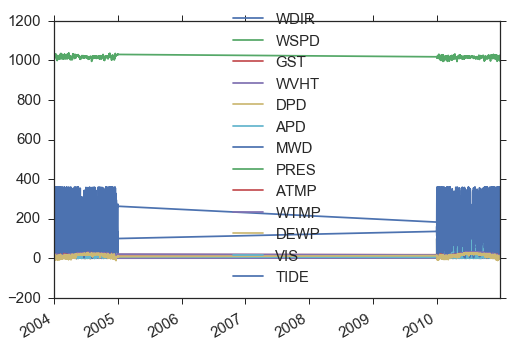

In [9]:
df4.append(df10).plot()

In [20]:
hist.buoy

41110

In [21]:
df = hist.get_all_stand_meteo()

2000 not in records
2001 not in records
2002 not in records
2003 not in records
2004 not in records
2005 not in records
2006 not in records
2007 not in records
2015 not in records
2016 not in records
2017 not in records
Dec2015 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=41110c2015.txt.gz&dir=data/stdmet/Dec/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2008.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2009.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2010.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2011.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2012.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.gov/view_text_file.php?filename=41110h2013.txt.gz&dir=data/historical/stdmet/
Link : http://www.ndbc.noaa.g

In [ ]:
df

In [18]:
df.head()

WDIR  WSPD  GST  WVHT  DPD  APD  MWD    PRES  ATMP  WTMP  \
2005-07-12 01:00:00   220     5  NaN   NaN  NaN  NaN  NaN  1019.4  27.5   NaN   
2005-07-12 03:00:00   200     5  NaN   NaN  NaN  NaN  NaN  1019.5  27.5   NaN   
2005-07-12 05:00:00   200     3  NaN   NaN  NaN  NaN  NaN  1019.3  27.5   NaN   
2005-07-12 07:00:00   210     4  NaN   NaN  NaN  NaN  NaN  1018.6  27.3   NaN   
2005-07-12 09:00:00   230     4  NaN   NaN  NaN  NaN  NaN  1018.9  27.5   NaN   

                     DEWP  VIS  TIDE  
2005-07-12 01:00:00   NaN  NaN   NaN  
2005-07-12 03:00:00   NaN  NaN   NaN  
2005-07-12 05:00:00   NaN  NaN   NaN  
2005-07-12 07:00:00   NaN  NaN   NaN  
2005-07-12 09:00:00   NaN  NaN   NaN

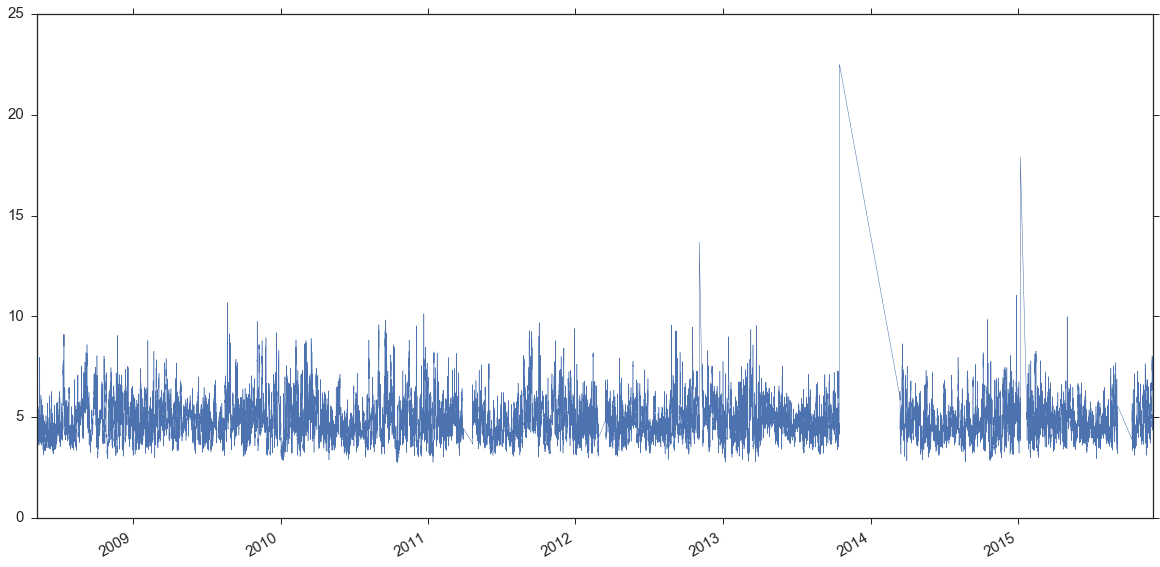

In [22]:
df.APD.plot(linewidth=.5,figsize=(20,10))

In [9]:
df.shape

(101314, 13)

In [23]:
import datetime as dt

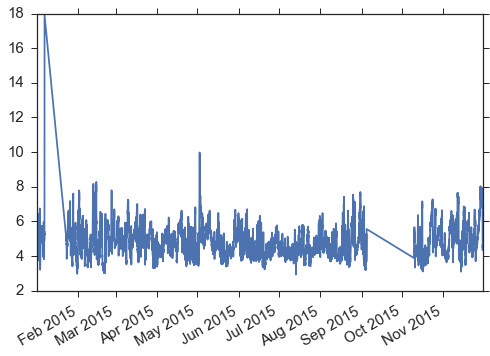

In [24]:
# In [22]: start = df.index.searchsorted(dt.datetime(2013, 1, 2))

# In [23]: end = df.index.searchsorted(dt.datetime(2013, 1, 4))

# In [24]: df.ix[start:end]
start = df.index.searchsorted(dt.datetime(2015, 1, 1))
end = df.index.searchsorted(dt.datetime(2016, 2, 20))
df.APD.ix[start:end].plot()

In [ ]:
df.APD.ix[start:end].plot(linewidth=.5)

In [1]:
"a" + 'b'

'ab'

In [13]:
rt = bp.realtime(41013)
ocean_data = rt.get_ocean()
wave_data = rt.get_spec()

In [7]:
wave_data.head()

WVHT  SwH  SwP  WWH  WWP  SwD  WWD STEEPNESS  APD  MWD
2016-02-04 17:42:00   1.6  1.3  7.1  0.9  4.5    S    S     STEEP  5.3  169
2016-02-04 16:42:00   1.7  1.5  7.7  0.9  5.0    S    S     STEEP  5.4  174
2016-02-04 15:41:00   2.0  0.0  NaN  2.0  7.1  NaN    S     STEEP  5.3  174
2016-02-04 14:41:00   2.0  1.2  7.7  1.5  5.9  SSE  SSE     STEEP  5.5  167
2016-02-04 13:41:00   2.0  1.7  7.1  0.9  4.8    S  SSE     STEEP  5.7  175

In [18]:
len(wave_data.WVHT.unique())

37

In [87]:
wave_data.DATE = wave_data.index

In [14]:
wave_data['date'] = wave_data.index
wave_data.head()

WVHT  SwH  SwP  WWH  WWP  SwD  WWD STEEPNESS  APD  MWD  \
2016-02-04 20:42:00   1.6  1.3  7.7  0.9  5.9    S  SSE   AVERAGE  5.5  172   
2016-02-04 19:42:00   1.7  0.0  NaN  1.7  8.3  NaN    S   AVERAGE  5.7  169   
2016-02-04 18:42:00   1.6  1.4  7.1  0.8  4.5  SSE    S     STEEP  5.5  165   
2016-02-04 17:42:00   1.6  1.3  7.1  0.9  4.5    S    S     STEEP  5.3  169   
2016-02-04 16:42:00   1.7  1.5  7.7  0.9  5.0    S    S     STEEP  5.4  174   

                                   date  
2016-02-04 20:42:00 2016-02-04 20:42:00  
2016-02-04 19:42:00 2016-02-04 19:42:00  
2016-02-04 18:42:00 2016-02-04 18:42:00  
2016-02-04 17:42:00 2016-02-04 17:42:00  
2016-02-04 16:42:00 2016-02-04 16:42:00

In [11]:
# fig,ax = plt.subplots(2,1,figsize = (10,10),sharex=True)

# ocean_data['OTMP'].plot(ax=ax[0])
# sns.despine()
# wave_data['H0'].plot(ax=ax[1])
# sns.despine()

# ax[0].set_ylabel('Ocean Temperature ($^\circ C$)')
# ax[1].set_ylabel('Wave Height ($m$)')

# Testing out pandas SQL call
We will use the following link:
https://plot.ly/python/big-data-analytics-with-pandas-and-sqlite/

In [1]:
from sqlalchemy import create_engine # database connection
import datetime as dt

In [2]:
disk_engine = create_engine('sqlite:///buoydata.db')

In [15]:
sql = disk_engine.execute("""SELECT name FROM sqlite_master WHERE type = 'table' """)

In [16]:
sql.fetchall()

[(u'wave_data',), (u'41110_buoy',)]

In [15]:
wave_data.to_sql('wave_data',disk_engine,if_exists='append')

In [18]:
df = pd.read_sql_query("""SELECT * FROM '41110_buoy' """,disk_engine)
df.describe()

WVHT            DPD            APD            MWD  \
count  116410.000000  116397.000000  116410.000000  114567.000000   
mean        0.925834       7.719368       4.823009     130.170162   
std         0.388525       2.789326       0.949202      41.671406   
min         0.020000       1.960000       2.750000       1.000000   
25%         0.650000       5.560000       4.150000     104.000000   
50%         0.840000       7.140000       4.700000     123.000000   
75%         1.100000       9.090000       5.330000     157.000000   
max         4.560000      25.000000      22.480000     359.000000   

                WTMP  
count  116422.000000  
mean       20.059086  
std         6.465822  
min         6.200000  
25%        13.900000  
50%        21.500000  
75%        26.100000  
max        30.000000

In [24]:
df.index = pd.to_datetime(df['index'])

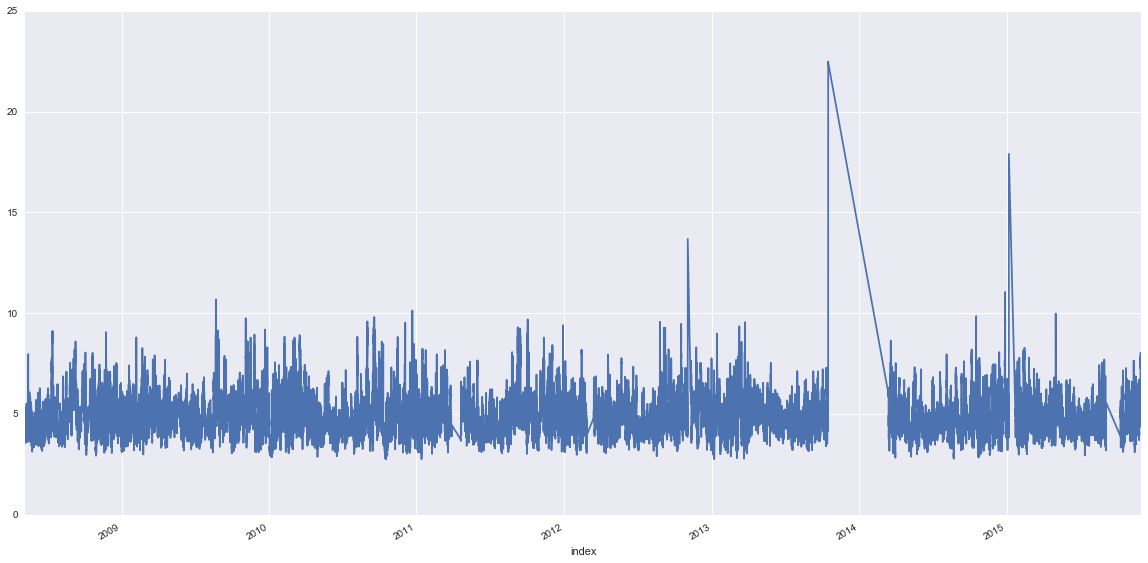

In [26]:
df.APD.plot(figsize=(20,10))

In [46]:
df.drop('index',axis=1)

WDIR WSPD  GST  WVHT    DPD   APD  MWD PRES ATMP  WTMP  \
date                                                                         
2008-05-07 20:21:00  NaN  NaN  NaN  0.61   9.09  4.37  NaN  NaN  NaN  21.7   
2008-05-07 20:51:00  NaN  NaN  NaN  0.64   9.09  4.10  104  NaN  NaN  21.7   
2008-05-07 21:21:00  NaN  NaN  NaN  0.64   9.88  4.16   98  NaN  NaN  21.7   
2008-05-07 21:51:00  NaN  NaN  NaN  0.63   6.67  4.11  120  NaN  NaN  21.7   
2008-05-07 22:21:00  NaN  NaN  NaN  0.66   9.88  4.01  102  NaN  NaN  21.7   
2008-05-07 22:51:00  NaN  NaN  NaN  0.66   9.88  4.31   95  NaN  NaN  21.6   
2008-05-07 23:21:00  NaN  NaN  NaN  0.67   9.88  4.35   94  NaN  NaN  21.6   
2008-05-07 23:51:00  NaN  NaN  NaN  0.64   6.25  4.31  123  NaN  NaN  21.6   
2008-05-08 00:21:00  NaN  NaN  NaN  0.65   6.25  4.07  125  NaN  NaN  21.5   
2008-05-08 00:51:00  NaN  NaN  NaN  0.73   6.25  4.03  120  NaN  NaN  21.5   
2008-05-08 01:21:00  NaN  NaN  NaN  0.72   9.88  3.92  108  NaN  NaN  21.5   
2008-05-08 01:51:00  NaN  NaN  NaN  0.80   2.94  3.76  192  NaN  NaN  21.4   
2008-05-08 02:21:00  NaN  NaN  NaN  0.78   3.03  3.72  182  NaN  NaN  21.4   
2008-05-08 02:51:00  NaN  NaN  NaN  0.80   3.33  3.56  177  NaN  NaN  21.3   
2008-05-08 03:21:00  NaN  NaN  NaN  0.85   3.45  3.67  181  NaN  NaN  21.3   
2008-05-08 03:51:00  NaN  NaN  NaN  0.81   3.70  3.66  174  NaN  NaN  21.3   
2008-05-08 04:21:00  NaN  NaN  NaN  0.83   4.00  3.63  160  NaN  NaN  21.2   
2008-05-08 04:51:00  NaN  NaN  NaN  0.92   4.00  3.90  164  NaN  NaN  21.2   
2008-05-08 05:21:00  NaN  NaN  NaN  0.91   4.55  3.87  163  NaN  NaN  21.2   
2008-05-08 05:51:00  NaN  NaN  NaN  0.93   4.35  3.90  171  NaN  NaN  21.2   
2008-05-08 06:21:00  NaN  NaN  NaN  0.93   4.76  3.86  174  NaN  NaN  21.2   
2008-05-08 06:51:00  NaN  NaN  NaN  1.01   5.00  4.00  170  NaN  NaN  21.2   
2008-05-08 07:21:00  NaN  NaN  NaN  1.04   5.00  3.96  174  NaN  NaN  21.2   
2008-05-08 07:51:00  NaN  NaN  NaN  1.03   5.26  4.07  171  NaN  NaN  21.1   
2008-05-08 08:21:00  NaN  NaN  NaN  1.00   4.55  4.05  172  NaN  NaN  21.1   
2008-05-08 08:51:00  NaN  NaN  NaN  1.03   5.56  4.07  165  NaN  NaN  21.1   
2008-05-08 09:51:00  NaN  NaN  NaN  0.98   5.26  4.15  171  NaN  NaN  21.1   
2008-05-08 10:21:00  NaN  NaN  NaN  0.99   5.26  4.03  167  NaN  NaN  21.1   
2008-05-08 11:21:00  NaN  NaN  NaN  1.01   5.26  4.16  170  NaN  NaN  21.2   
2008-05-08 11:51:00  NaN  NaN  NaN  1.04   5.26  4.19  172  NaN  NaN  21.2   
...                  ...  ...  ...   ...    ...   ...  ...  ...  ...   ...   
2015-11-30 09:06:00  NaN  NaN  NaN  0.86   9.88  4.79  105  NaN  NaN  17.2   
2015-11-30 09:36:00  NaN  NaN  NaN  0.90   9.88  4.48  106  NaN  NaN  17.2   
2015-11-30 10:06:00  NaN  NaN  NaN  0.95   9.09  4.53  106  NaN  NaN  17.2   
2015-11-30 10:36:00  NaN  NaN  NaN  1.01   9.88  4.52  109  NaN  NaN  17.3   
2015-11-30 11:06:00  NaN  NaN  NaN  1.04   9.88  4.35  113  NaN  NaN  17.2   
2015-11-30 11:36:00  NaN  NaN  NaN  1.07   9.88  4.55  109  NaN  NaN  17.2   
2015-11-30 12:06:00  NaN  NaN  NaN  1.10   9.88  4.65  105  NaN  NaN  17.2   
2015-11-30 12:36:00  NaN  NaN  NaN  1.11   9.88  4.49  104  NaN  NaN  17.2   
2015-11-30 13:06:00  NaN  NaN  NaN  1.08  10.53  4.59  102  NaN  NaN  17.2   
2015-11-30 13:36:00  NaN  NaN  NaN  1.12   9.09  4.54  112  NaN  NaN  17.2   
2015-11-30 14:06:00  NaN  NaN  NaN  1.17   9.88  4.68  105  NaN  NaN  17.2   
2015-11-30 14:36:00  NaN  NaN  NaN  1.19   5.00  4.52   91  NaN  NaN  17.1   
2015-11-30 15:06:00  NaN  NaN  NaN  1.14   9.88  4.58  112  NaN  NaN  17.1   
2015-11-30 15:36:00  NaN  NaN  NaN  1.17   9.88  4.61  108  NaN  NaN  17.1   
2015-11-30 16:06:00  NaN  NaN  NaN  1.18   9.88  4.75  108  NaN  NaN  17.1   
2015-11-30 16:36:00  NaN  NaN  NaN  1.13  10.53  4.64  112  NaN  NaN  17.2   
2015-11-30 17:06:00  NaN  NaN  NaN  1.08   5.26  4.60   84  NaN  NaN  17.2   
2015-11-30 17:36:00  NaN  NaN  NaN  1.09  10.53  4.78  113  NaN  NaN  17.2   
2015-11-30 18:06:00  NaN  NaN  NaN  1.09  

In [14]:
df = pd.read_sql_query("""SELECT max(rowid) FROM wave_data GROUP BY date""",disk_engine)

In [15]:
df

max(rowid)
0           3288
1           3287
2           3286
3           3285
4           3284
5           3283
6           3282
7           3281
8           3280
9           3279
10          3278
11          3277
12          3276
13          3275
14          3274
15          3273
16          3272
17          3271
18          3270
19          3269
20          3268
21          3267
22          3266
23          3265
24          3264
25          3263
26          3262
27          3261
28          3260
29          3259
...          ...
1068        2220
1069        2219
1070        2218
1071        2217
1072        2216
1073        2215
1074        2214
1075        2213
1076        2212
1077        2211
1078        2210
1079        2209
1080        2208
1081        2207
1082        2206
1083        2205
1084        2204
1085        2203
1086        2202
1087        2201
1088        2200
1089        2199
1090        2198
1091        2197
1092        2196
1093        2195
1094        2194
1095        2193
1096        2192
1097        2191

[1098 rows x 1 columns]

In [16]:
sql = disk_engine.execute("""DELETE FROM wave_data WHERE rowid not in (SELECT max(rowid) FROM wave_data GROUP BY date)""")

#sql.close()

In [17]:
sql.close()

In [27]:
df = pd.read_sql_query("""DELETE FROM wave_data WHERE rowid not in (SELECT max(rowid) FROM wave_data GROUP BY date)""",disk_engine)
df.describe()

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [84]:
df = pd.read_sql_query('SELECT rowid FROM wave_data',disk_engine)
len(np.unique(df))

2223

In [54]:
df.index = df.index.to_datetime()

In [55]:
np.unique(df.index).shape

(1093,)

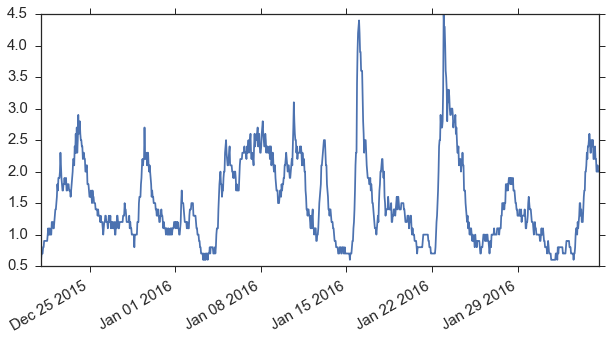

In [56]:
df.WVHT.plot(figsize=(10,5));

# SQL Stuff

In [23]:
conn = sq.connect('wave_data.db')

In [24]:
c = conn.cursor()

In [25]:
vals = c.execute('SELECT * FROM wave_info')


In [26]:
len(vals.fetchall())

1096

In [21]:
c.execute("""DELETE FROM wave_info WHERE rowid not in (SELECT max(rowid) FROM wave_info GROUP BY date)""")

OperationalError: no such column: date

In [72]:
x

[]

In [22]:
c.close()

# Getting the historical data

In [22]:
params = 'data_spec'

buoy = 42040
year = 2005

base = 'http://www.ndbc.noaa.gov/view_text_file.php?filename='
link = base + str(buoy) + 'h' + str(year) + '.txt.gz&dir=data/historical/stdmet/'


#combine the first five date columns YY MM DD hh mm and make index
df = pd.read_csv(link,delim_whitespace=True,na_values=999,
    parse_dates=[[0,1,2,3]], index_col=0)

df.index.name = 'Date'
#df.drop(df.index[0], inplace=True)
#convert the dates to datetimes
#df.index = pd.to_datetime(df.index,format="%YY %mm %dd %HH")

#specs = df.iloc[:,1::2]
#freqs = df.iloc[0,2::2]

#specs.columns=freqs

#remove the parenthesis from the column index
#specs.columns = [cname.replace('(','').replace(')','') 
#    for cname in specs.columns]

In [23]:
df.head()

mm   WD  WSPD  GST  WVHT   DPD   APD  MWD     BAR  ATMP  \
Date                                                                           
2005-01-01 00:00:00   0   88   5.6  6.9  1.93  8.33  6.02  150  1024.3  20.6   
2005-01-01 01:00:00   0   95   5.8  6.9  1.88  9.09  6.18  149  1025.1  20.6   
2005-01-01 02:00:00   0  102   7.2  8.4  1.78  9.09  5.73  153  1025.0  20.6   
2005-01-01 03:00:00   0  107   7.0  8.0  2.00  9.09  6.06  153  1025.2  20.7   
2005-01-01 04:00:00   0  107   6.4  7.6  2.01  9.09  5.81  156  1025.6  21.2   

                     WTMP  DEWP  VIS  TIDE  
Date                                        
2005-01-01 00:00:00  21.4  18.2   99    99  
2005-01-01 01:00:00  21.4  18.6   99    99  
2005-01-01 02:00:00  21.4  18.5   99    99  
2005-01-01 03:00:00  21.4  18.7   99    99  
2005-01-01 04:00:00  21.4  18.7   99    99

In [33]:
df.WVHT[df.WVHT==99] = np.nan

In [7]:
reload(bp)

<module 'buoypy' from '/Users/nickc/Documents/buoypy/buoypy/__init__.pyc'>

In [8]:
import buoypy

In [29]:
buoy = 41013 #42040
year = 2003
#hist = bp.historic_data(buoy,year,year_range=(2003,2007))

In [6]:
df = hist.get_all_stand_meteo()

In [8]:
df.head()

Empty DataFrame
Columns: []
Index: []

In [19]:
start,stop = (2003,2014)

df=pd.DataFrame() #initialize empty df

for ii in range(start,stop+1):
    
    hist = bp.historic_data(buoy,ii)
    new_df = hist.get_stand_meteo()
    
    print 'retrieving year : ' +str(ii)
    
    df = df.append(new_df)

retrieving year : 2003
retrieving year : 2004
retrieving year : 2005
retrieving year : 2006
retrieving year : 2007
retrieving year : 2008
retrieving year : 2009
retrieving year : 2010
retrieving year : 2011
retrieving year : 2012
retrieving year : 2013
retrieving year : 2014


HTTPError: HTTP Error 404: Not Found

In [25]:
hist = bp.historic_data(buoy,2010)

In [26]:
df = hist.get_stand_meteo()

In [27]:
df.head()

mm  WDIR WSPD  GST  WVHT   DPD   APD  MWD    PRES  ATMP  WTMP  \
Date                                                                           
#yr mo dy hr   mn  degT  m/s  m/s     m   sec   sec  deg     hPa  degC  degC   
2009 12 31 23  50   183  3.6  4.1  1.27  7.14  5.86  136  1018.2  17.5  17.5   
2010 01 01 00  50   188  4.2  4.9  1.31  6.67  6.19  142  1017.8  18.0  17.4   
2010 01 01 01  50   196  4.3  5.0  1.42  6.25  6.28  161  1017.4  18.2  17.3   
2010 01 01 02  50   195  4.8  5.6  1.27  7.14  5.94  116  1016.6  18.4  17.2   

               DEWP   VIS   TIDE  
Date                              
#yr mo dy hr   degC   nmi     ft  
2009 12 31 23  13.7  99.0  99.00  
2010 01 01 00  14.4  99.0  99.00  
2010 01 01 01  15.0  99.0  99.00  
2010 01 01 02  15.4  99.0  99.00

In [124]:
year = 2003

In [133]:
base = 'http://www.ndbc.noaa.gov/view_text_file.php?filename='
link = base + str(buoy) + 'h' + str(year) + '.txt.gz&dir=data/historical/stdmet/'

#combine the first five date columns YY MM DD hh and make index
df = pd.read_csv(link,delim_whitespace=True,na_values=[99,999,9999,99.,999.,9999.])#,
    #parse_dates=[[0,1,2,3]], index_col=0)
    


# date_str = df.YY + ' ' + df.MM+ ' ' + df.DD + ' ' + df.hh + ' ' + df.mm

if df.iloc[0,0] =='#yr':
    
    
    df = df.rename(columns={'#YY': 'YY'}) #get rid of hash
    
    #make the indices
    date_str = df.YY + ' ' + df.MM+ ' ' + df.DD + ' ' + df.hh + ' ' + df.mm
    df.drop(0,inplace=True) #first row is units, so drop them
    ind = pd.to_datetime(date_str.drop(0),format="%Y %m %d %H %M")
    
    df.index = ind
    
    #drop useless columns and rename the ones we want
    df.drop(['YY','MM','DD','hh','mm'],axis=1,inplace=True)
    df.columns = ['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES',
       'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
    
else:
    date_str = df.YYYY.astype('str') + ' ' + df.MM.astype('str') + ' ' \
        + df.DD.astype('str') + ' ' + df.hh.astype('str')
        
    ind = pd.to_datetime(date_str,format="%Y %m %d %H")
    
    df.index = ind
    
    #drop useless columns and rename the ones we want
    df.drop(['YYYY','MM','DD','hh'],axis=1,inplace=True)
    df.columns = ['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES',
       'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
    
# try:
#     ind = pd.to_datetime(date_str,format="%Y %m %d %H %M")
#     df.index = ind
# except:
#     df.drop(0,inplace=True) #first row is units, so drop them
#     ind = pd.to_datetime(date_str.drop(0),format="%Y %m %d %H %M")
#     df.index = ind

#df.drop(['YY','MM','DD','hh','mm'],axis=1,inplace=True)
    
    
#df.index.name = 'Date'

In [121]:
#df.columns[0] = ['yy']

In [134]:
df.head()

WDIR  WSPD   GST  WVHT    DPD   APD  MWD  PRES  ATMP  \
2003-11-10 23:00:00    22   9.3  11.5   NaN    NaN   NaN   81   NaN   NaN   
2003-11-11 00:00:00    29   9.1  11.4  2.14   9.09  5.72   94   NaN   NaN   
2003-11-11 01:00:00    26   9.3  11.9  2.13   9.09  5.69   81   NaN   NaN   
2003-11-11 02:00:00    34  10.0  12.1  2.13   9.09  5.68   92   NaN   NaN   
2003-11-11 03:00:00    42   9.1  11.5  2.14  10.00  5.52   90   NaN   NaN   

                     WTMP  DEWP  VIS  TIDE  
2003-11-10 23:00:00   NaN   NaN  NaN   NaN  
2003-11-11 00:00:00   NaN   NaN  NaN   NaN  
2003-11-11 01:00:00   NaN   NaN  NaN   NaN  
2003-11-11 02:00:00   NaN   NaN  NaN   NaN  
2003-11-11 03:00:00   NaN   NaN  NaN   NaN

In [97]:
df.head()

YYYY  MM  DD  hh  WD  WSPD   GST  WVHT    DPD   APD  MWD  BAR  ATMP  WTMP  \
0  2003  11  10  23  22   9.3  11.5   NaN    NaN   NaN   81  NaN   NaN   NaN   
1  2003  11  11   0  29   9.1  11.4  2.14   9.09  5.72   94  NaN   NaN   NaN   
2  2003  11  11   1  26   9.3  11.9  2.13   9.09  5.69   81  NaN   NaN   NaN   
3  2003  11  11   2  34  10.0  12.1  2.13   9.09  5.68   92  NaN   NaN   NaN   
4  2003  11  11   3  42   9.1  11.5  2.14  10.00  5.52   90  NaN   NaN   NaN   

   DEWP  VIS  TIDE  
0   NaN  NaN   NaN  
1   NaN  NaN   NaN  
2   NaN  NaN   NaN  
3   NaN  NaN   NaN  
4   NaN  NaN   NaN

In [101]:
df.iloc[0,0]

2003.0

In [104]:
df.head()

#YY  MM  DD  hh  mm  WDIR WSPD  GST  WVHT   DPD   APD  MWD    PRES  ATMP  \
0   #yr  mo  dy  hr  mn  degT  m/s  m/s     m   sec   sec  deg     hPa  degC   
1  2009  12  31  23  50   183  3.6  4.1  1.27  7.14  5.86  136  1018.2  17.5   
2  2010  01  01  00  50   188  4.2  4.9  1.31  6.67  6.19  142  1017.8  18.0   
3  2010  01  01  01  50   196  4.3  5.0  1.42  6.25  6.28  161  1017.4  18.2   
4  2010  01  01  02  50   195  4.8  5.6  1.27  7.14  5.94  116  1016.6  18.4   

   WTMP  DEWP  VIS   TIDE  
0  degC  degC  nmi     ft  
1  17.5  13.7  NaN  99.00  
2  17.4  14.4  NaN  99.00  
3  17.3  15.0  NaN  99.00  
4  17.2  15.4  NaN  99.00

In [105]:
df.iloc[0,0]

'#yr'

In [65]:
df.columns = [u'YY', u'MM', u'DD', u'hh', u'mm', u'WDIR', u'WSPD', u'GST', u'WVHT',
       u'DPD', u'APD', u'MWD', u'PRES', u'ATMP', u'WTMP', u'DEWP', u'VIS',
       u'TIDE']

In [76]:
x = df.YY + ' ' + df.MM+ ' ' + df.DD + ' ' + df.hh + ' ' + df.mm

In [77]:
x

0        #yr mo dy hr mn
1       2009 12 31 23 50
2       2010 01 01 00 50
3       2010 01 01 01 50
4       2010 01 01 02 50
5       2010 01 01 03 50
6       2010 01 01 04 50
7       2010 01 01 05 50
8       2010 01 01 06 50
9       2010 01 01 07 50
10      2010 01 01 08 50
11      2010 01 01 09 50
12      2010 01 01 10 50
13      2010 01 01 11 50
14      2010 01 01 12 50
15      2010 01 01 13 50
16      2010 01 01 14 50
17      2010 01 01 15 50
18      2010 01 01 16 50
19      2010 01 01 17 50
20      2010 01 01 18 50
21      2010 01 01 19 50
22      2010 01 01 20 50
23      2010 01 01 21 50
24      2010 01 01 22 50
25      2010 01 01 23 50
26      2010 01 02 00 50
27      2010 01 02 01 50
28      2010 01 02 02 50
29      2010 01 02 03 50
              ...       
8674    2010 12 30 17 50
8675    2010 12 30 18 50
8676    2010 12 30 19 50
8677    2010 12 30 20 50
8678    2010 12 30 21 50
8679    2010 12 30 22 50
8680    2010 12 30 23 50
8681    2010 12 31 00 50
8682    2010 12 31 01 50


In [79]:
x.drop(0).head()

1    2009 12 31 23 50
2    2010 01 01 00 50
3    2010 01 01 01 50
4    2010 01 01 02 50
5    2010 01 01 03 50
dtype: object

In [81]:
ind = pd.to_datetime(x.drop(0),format="%Y %m %d %H %M")

In [82]:
i

1      2009-12-31 23:50:00
2      2010-01-01 00:50:00
3      2010-01-01 01:50:00
4      2010-01-01 02:50:00
5      2010-01-01 03:50:00
6      2010-01-01 04:50:00
7      2010-01-01 05:50:00
8      2010-01-01 06:50:00
9      2010-01-01 07:50:00
10     2010-01-01 08:50:00
11     2010-01-01 09:50:00
12     2010-01-01 10:50:00
13     2010-01-01 11:50:00
14     2010-01-01 12:50:00
15     2010-01-01 13:50:00
16     2010-01-01 14:50:00
17     2010-01-01 15:50:00
18     2010-01-01 16:50:00
19     2010-01-01 17:50:00
20     2010-01-01 18:50:00
21     2010-01-01 19:50:00
22     2010-01-01 20:50:00
23     2010-01-01 21:50:00
24     2010-01-01 22:50:00
25     2010-01-01 23:50:00
26     2010-01-02 00:50:00
27     2010-01-02 01:50:00
28     2010-01-02 02:50:00
29     2010-01-02 03:50:00
30     2010-01-02 04:50:00
               ...        
8674   2010-12-30 17:50:00
8675   2010-12-30 18:50:00
8676   2010-12-30 19:50:00
8677   2010-12-30 20:50:00
8678   2010-12-30 21:50:00
8679   2010-12-30 22:50:00
8

In [61]:
#d#f.WVHT.plot()

In [9]:
#df.append(df).shape

In [10]:
#df2=pd.DataFrame()

In [6]:
#df2.append(df)

In [20]:
start=2002
stop=2017
buoy = 41013

In [23]:
import urllib2

In [24]:
yr_rng = []
for ii in range(start,stop+1):


    base = 'http://www.ndbc.noaa.gov/view_text_file.php?filename='
    link = base + str(buoy) + 'h' + str(ii) + '.txt.gz&dir=data/historical/stdmet/'


    try:
        urllib2.urlopen(link)
        yr_rng.append(ii)

    except:
        print(str(ii) + ' not in records')

2002 not in records
2015 not in records
2016 not in records
2017 not in records


In [22]:
urllib2.urlopen(link)

NameError: name 'urllib2' is not defined

In [25]:
yr_rng

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [12]:
if not 'asdkkjf':
    print 4
    

In [13]:
import datetime

In [16]:
datetime.date.today().month

2

In [19]:
x = np.random.rand(10,10,10)

In [33]:
G = x[:,:,0:10:2]

In [34]:
G.shape

(10, 10, 5)

In [23]:
range(0,2,4)

[0]